# Milestone 2

By: Maheswara Sinatriyo

Batch: HCK-001

## Problem Statement

Classification of airlines customer satisfaction

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import pickle

from sklearn.pipeline import Pipeline

## Data Loading

SOURCE: https://www.kaggle.com/datasets/sjleshrac/airlines-customer-satisfaction

In [2]:
# Data loading
df = pd.read_csv('Invistico_Airline.csv')
# Original backup
df_original = df.copy()
df

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0


## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

The columns label consist of many spaces and capital character, we will be renaming it to make it eazier for processing

In [4]:
# remove spaces and lowercase
df.columns = [col.lower().replace(' ', '_') for col in df.columns]
df.columns

Index(['satisfaction', 'gender', 'customer_type', 'age', 'type_of_travel',
       'class', 'flight_distance', 'seat_comfort',
       'departure/arrival_time_convenient', 'food_and_drink', 'gate_location',
       'inflight_wifi_service', 'inflight_entertainment', 'online_support',
       'ease_of_online_booking', 'on-board_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'cleanliness', 'online_boarding',
       'departure_delay_in_minutes', 'arrival_delay_in_minutes'],
      dtype='object')

In [5]:
df.rename(columns={'on-board_service':'onboard_service'}, inplace=True)  

In [6]:
df.isnull().sum()

satisfaction                           0
gender                                 0
customer_type                          0
age                                    0
type_of_travel                         0
class                                  0
flight_distance                        0
seat_comfort                           0
departure/arrival_time_convenient      0
food_and_drink                         0
gate_location                          0
inflight_wifi_service                  0
inflight_entertainment                 0
online_support                         0
ease_of_online_booking                 0
onboard_service                        0
leg_room_service                       0
baggage_handling                       0
checkin_service                        0
cleanliness                            0
online_boarding                        0
departure_delay_in_minutes             0
arrival_delay_in_minutes             393
dtype: int64

We will be dropping the nulls later

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,129880.0,39.427957,15.119360,7.0,27.0,40.0,51.0,85.0
flight_distance,129880.0,1981.409055,1027.115606,50.0,1359.0,1925.0,2544.0,6951.0
seat_comfort,129880.0,2.838597,1.392983,0.0,2.0,3.0,4.0,5.0
departure/arrival_time_convenient,129880.0,2.990645,1.527224,0.0,2.0,3.0,4.0,5.0
food_and_drink,129880.0,2.851994,1.443729,0.0,2.0,3.0,4.0,5.0
gate_location,129880.0,2.990422,1.305970,0.0,2.0,3.0,4.0,5.0
inflight_wifi_service,129880.0,3.249130,1.318818,0.0,2.0,3.0,4.0,5.0
inflight_entertainment,129880.0,3.383477,1.346059,0.0,2.0,4.0,4.0,5.0
online_support,129880.0,3.519703,1.306511,0.0,3.0,4.0,5.0,5.0
ease_of_online_booking,129880.0,3.472105,1.305560,0.0,2.0,4.0,5.0,5.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of Unique Value:  2
satisfied       71087
dissatisfied    58793
Name: satisfaction, dtype: int64


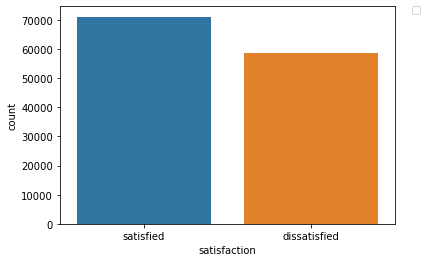

In [9]:
# Satisfaction
print("Number of Unique Value: ", df['satisfaction'].nunique())
print(df['satisfaction'].value_counts())

# countplot
sns.countplot(data=df,x='satisfaction')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

The data are quite balanced, no further balancing needed

Number of Unique Value:  2
Female    65899
Male      63981
Name: gender, dtype: int64


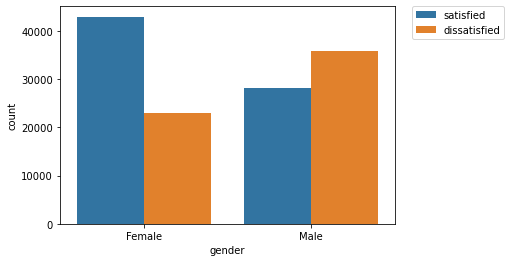

In [10]:
# Gender
print("Number of Unique Value: ", df['gender'].nunique())
print(df['gender'].value_counts())

# countplot
sns.countplot(data=df,x='gender',hue='satisfaction')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

generally female customers are more satisfied with the service than male customers

Number of Unique Value:  2
Loyal Customer       106100
disloyal Customer     23780
Name: customer_type, dtype: int64


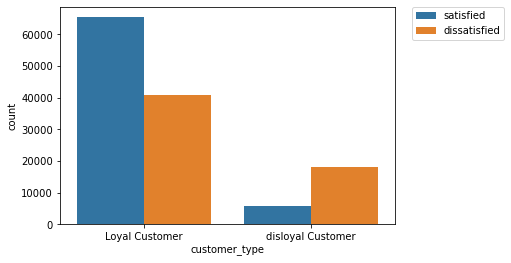

In [11]:
# Customer Type
print("Number of Unique Value: ", df['customer_type'].nunique())
print(df['customer_type'].value_counts())

# countplot
sns.countplot(data=df,x='customer_type',hue='satisfaction')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

It is to be noted that most user who are satisfied are a loyal customers, but there is still a lot of loyal customer that are disatisfied with the service. Thus improving satisfaction will ensure the loyalty of customers. It is to be noted that most people who fill the questionaire are a loyal customers

Number of Unique Value:  2
Business travel    89693
Personal Travel    40187
Name: type_of_travel, dtype: int64


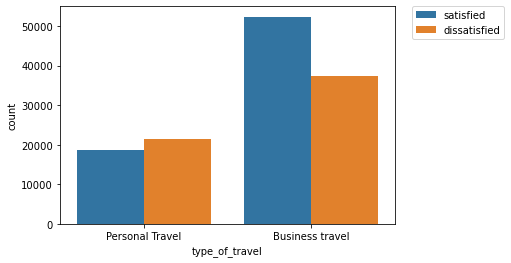

In [12]:
# Type of Travel
print("Number of Unique Value: ", df['type_of_travel'].nunique())
print(df['type_of_travel'].value_counts())

# countplot
sns.countplot(data=df,x='type_of_travel',hue='satisfaction')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Mostly, business traveller are satisfied with the service, while personal travel are not that satisfied. Perhaps this is because business user does not necessarily use their own money to fly that is why they are not that picky with the service while personal traveler tends to want to have their money spent worth to the pennies. But in general there are more business traveler than personal traveler.

Number of Unique Value:  3
Business    62160
Eco         58309
Eco Plus     9411
Name: class, dtype: int64


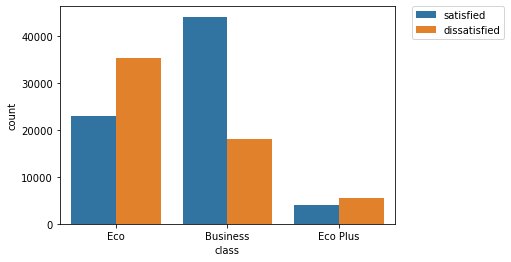

In [13]:
# Class
print("Number of Unique Value: ", df['class'].nunique())
print(df['class'].value_counts())

# countplot
sns.countplot(data=df,x='class',hue='satisfaction')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Like previous analysis, we can see that business class are mostly satisfied with the service.

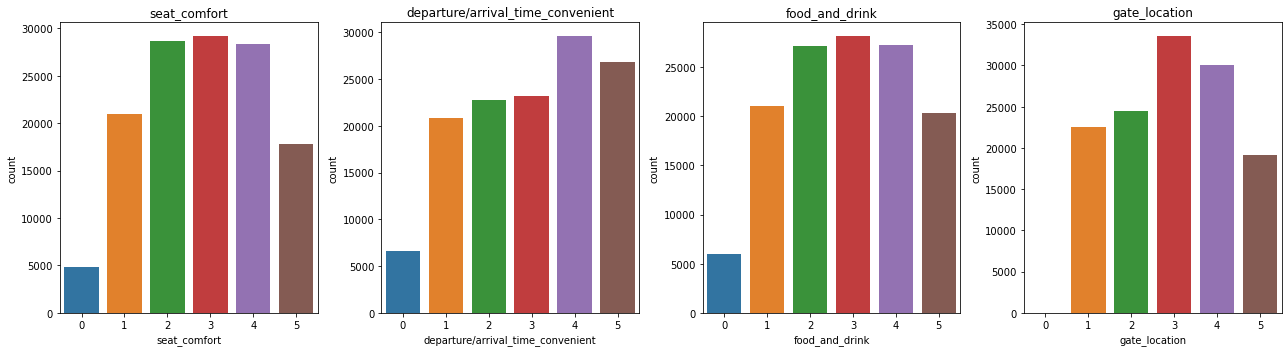

In [14]:
plt.figure(figsize=(18,5))
plt.subplot(1,4,1)
sns.countplot(x = 'seat_comfort', data=df, palette="tab10")
plt.title('seat_comfort')

plt.subplot(1,4,2)
sns.countplot(x = 'departure/arrival_time_convenient', data=df, palette="tab10")
plt.title('departure/arrival_time_convenient')

plt.subplot(1,4,3)
sns.countplot(x = 'food_and_drink', data=df, palette="tab10")
plt.title('food_and_drink')

plt.subplot(1,4,4)
sns.countplot(x = 'gate_location', data=df, palette="tab10")
plt.title('gate_location')

plt.tight_layout()

plt.show()

* Seat comfort, overall users are generally okay with the comfort, since the rating distribution are generally between 2-4
* Time Convenient, users are genreally satisfied
* Food an Drink, user are generally okay with the service
* Gate Location, users are genraly okay with the service


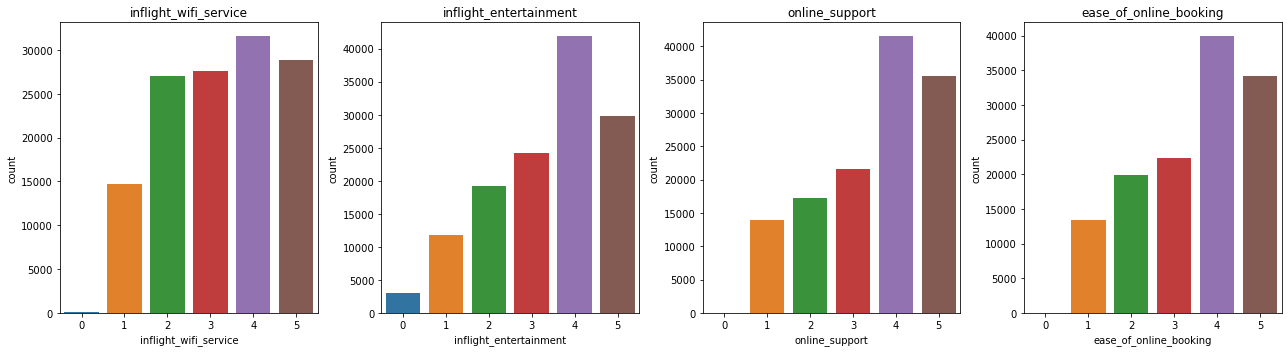

In [15]:
plt.figure(figsize=(18,5))
plt.subplot(1,4,1)
sns.countplot(x = 'inflight_wifi_service', data=df, palette="tab10")
plt.title('inflight_wifi_service')

plt.subplot(1,4,2)
sns.countplot(x = 'inflight_entertainment', data=df, palette="tab10")
plt.title('inflight_entertainment')

plt.subplot(1,4,3)
sns.countplot(x = 'online_support', data=df, palette="tab10")
plt.title('online_support')

plt.subplot(1,4,4)
sns.countplot(x = 'ease_of_online_booking', data=df, palette="tab10")
plt.title('ease_of_online_booking')

plt.tight_layout()

plt.show()

* wifi service, generally distributed, users are okay with the service
* entertainment, users are generally satisfied with the service
* online support, users are generally satisfied
* ease of online booking, users are satisfied with how easy it is to book the flight

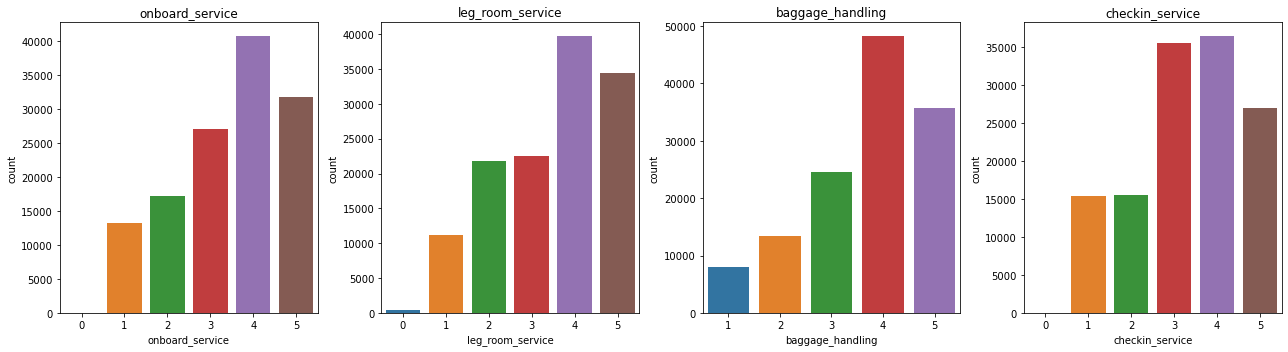

In [16]:
plt.figure(figsize=(18,5))
plt.subplot(1,4,1)
sns.countplot(x = 'onboard_service', data=df, palette="tab10")
plt.title('onboard_service')

plt.subplot(1,4,2)
sns.countplot(x = 'leg_room_service', data=df, palette="tab10")
plt.title('leg_room_service')

plt.subplot(1,4,3)
sns.countplot(x = 'baggage_handling', data=df, palette="tab10")
plt.title('baggage_handling')

plt.subplot(1,4,4)
sns.countplot(x = 'checkin_service', data=df, palette="tab10")
plt.title('checkin_service')

plt.tight_layout()

plt.show()

* onboard service are generraly good
* leg room service are generally satisfactory
* baggage handling service are good
* checkin service are good

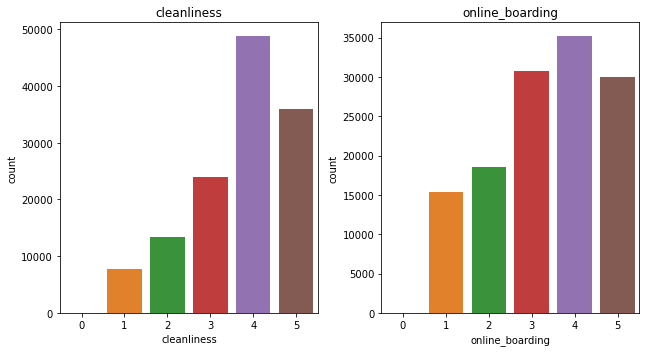

In [17]:
plt.figure(figsize=(18,5))
plt.subplot(1,4,1)
sns.countplot(x = 'cleanliness', data=df, palette="tab10")
plt.title('cleanliness')

plt.subplot(1,4,2)
sns.countplot(x = 'online_boarding', data=df, palette="tab10")
plt.title('online_boarding')

plt.tight_layout()

plt.show()

* overall the airlines are clean enough
* online boarding is good

## Data Preprocessing

### Data split Inference

In [18]:
# Inference dataframe
df_inference = df.sample(10, random_state=49)
df_inference

,satisfaction,gender,customer_type,age,type_of_travel,class,flight_distance,seat_comfort,departure/arrival_time_convenient,food_and_drink,...,online_support,ease_of_online_booking,onboard_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes,arrival_delay_in_minutes
12520,dissatisfied,Male,Loyal Customer,68,Personal Travel,Eco,1685,2,4,2,...,4,4,5,5,4,3,5,4,12,8.0
120478,satisfied,Female,Loyal Customer,52,Business travel,Business,2226,4,4,4,...,5,5,5,5,5,4,5,5,54,35.0
121914,satisfied,Female,Loyal Customer,34,Business travel,Business,2866,4,4,4,...,5,5,5,5,5,4,5,5,65,105.0
98964,satisfied,Female,Loyal Customer,33,Business travel,Business,868,3,3,3,...,5,4,4,4,4,4,4,4,0,0.0
33433,dissatisfied,Female,Loyal Customer,66,Personal Travel,Eco,683,4,3,4,...,2,1,1,4,1,1,1,1,61,48.0
2811,dissatisfied,Male,Loyal Customer,41,Personal Travel,Eco,1458,1,3,1,...,5,5,1,1,4,3,1,5,0,2.0
48078,dissatisfied,Male,disloyal Customer,62,Business travel,Business,2711,2,2,2,...,3,3,3,5,5,4,5,3,0,0.0
17171,satisfied,Female,Loyal Customer,69,Personal Travel,Eco,990,4,4,4,...,4,4,4,4,4,3,4,4,27,12.0
7119,satisfied,Female,Loyal Customer,69,Personal Travel,Eco,376,3,3,3,...,5,3,3,3,3,4,3,4,61,49.0
112578,satisfied,Female,Loyal Customer,43,Business travel,Business,1932,3,3,3,...,5,4,4,5,4,3,4,4,16,0.0


In [19]:
# Dataframe without Inference
df_train_test = df.drop(df_inference.index)
df_train_test

,satisfaction,gender,customer_type,age,type_of_travel,class,flight_distance,seat_comfort,departure/arrival_time_convenient,food_and_drink,...,online_support,ease_of_online_booking,onboard_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes,arrival_delay_in_minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0


In [20]:
# Drop index
df_inference.reset_index(inplace=True,drop=True)
df_train_test.reset_index(inplace=True,drop=True)
df_inference

,satisfaction,gender,customer_type,age,type_of_travel,class,flight_distance,seat_comfort,departure/arrival_time_convenient,food_and_drink,...,online_support,ease_of_online_booking,onboard_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes,arrival_delay_in_minutes
0,dissatisfied,Male,Loyal Customer,68,Personal Travel,Eco,1685,2,4,2,...,4,4,5,5,4,3,5,4,12,8.0
1,satisfied,Female,Loyal Customer,52,Business travel,Business,2226,4,4,4,...,5,5,5,5,5,4,5,5,54,35.0
2,satisfied,Female,Loyal Customer,34,Business travel,Business,2866,4,4,4,...,5,5,5,5,5,4,5,5,65,105.0
3,satisfied,Female,Loyal Customer,33,Business travel,Business,868,3,3,3,...,5,4,4,4,4,4,4,4,0,0.0
4,dissatisfied,Female,Loyal Customer,66,Personal Travel,Eco,683,4,3,4,...,2,1,1,4,1,1,1,1,61,48.0
5,dissatisfied,Male,Loyal Customer,41,Personal Travel,Eco,1458,1,3,1,...,5,5,1,1,4,3,1,5,0,2.0
6,dissatisfied,Male,disloyal Customer,62,Business travel,Business,2711,2,2,2,...,3,3,3,5,5,4,5,3,0,0.0
7,satisfied,Female,Loyal Customer,69,Personal Travel,Eco,990,4,4,4,...,4,4,4,4,4,3,4,4,27,12.0
8,satisfied,Female,Loyal Customer,69,Personal Travel,Eco,376,3,3,3,...,5,3,3,3,3,4,3,4,61,49.0
9,satisfied,Female,Loyal Customer,43,Business travel,Business,1932,3,3,3,...,5,4,4,5,4,3,4,4,16,0.0


### Train Test Split

In [21]:
# X (features), y (target)

X = df_train_test.drop('satisfaction',axis=1)
y = df_train_test['satisfaction']
X

,gender,customer_type,age,type_of_travel,class,flight_distance,seat_comfort,departure/arrival_time_convenient,food_and_drink,gate_location,...,online_support,ease_of_online_booking,onboard_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes,arrival_delay_in_minutes
0,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129865,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,3,...,2,2,3,3,4,4,4,2,0,0.0
129866,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,4,...,1,3,2,3,3,1,2,1,174,172.0
129867,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,3,...,2,4,4,3,4,2,3,2,155,163.0
129868,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,2,...,2,3,3,2,3,2,1,2,193,205.0


In [22]:
# Train Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

print('Train Size : ', X_train.shape)
print('Test Size : ', X_test.shape)

Train Size :  (103896, 22)
Test Size :  (25974, 22)


In [23]:
# Reset index
X_train.reset_index(inplace=True,drop=True)
X_test.reset_index(inplace=True,drop=True)
y_train.reset_index(inplace=True,drop=True)
y_test.reset_index(inplace=True,drop=True)

In [24]:
X_train.isnull().sum()

gender                                 0
customer_type                          0
age                                    0
type_of_travel                         0
class                                  0
flight_distance                        0
seat_comfort                           0
departure/arrival_time_convenient      0
food_and_drink                         0
gate_location                          0
inflight_wifi_service                  0
inflight_entertainment                 0
online_support                         0
ease_of_online_booking                 0
onboard_service                        0
leg_room_service                       0
baggage_handling                       0
checkin_service                        0
cleanliness                            0
online_boarding                        0
departure_delay_in_minutes             0
arrival_delay_in_minutes             318
dtype: int64

In [25]:
X_test.isnull().sum()

gender                                0
customer_type                         0
age                                   0
type_of_travel                        0
class                                 0
flight_distance                       0
seat_comfort                          0
departure/arrival_time_convenient     0
food_and_drink                        0
gate_location                         0
inflight_wifi_service                 0
inflight_entertainment                0
online_support                        0
ease_of_online_booking                0
onboard_service                       0
leg_room_service                      0
baggage_handling                      0
checkin_service                       0
cleanliness                           0
online_boarding                       0
departure_delay_in_minutes            0
arrival_delay_in_minutes             75
dtype: int64

### EDA 2 for Feature Selection

In [26]:
# concate X and y to temporary df for EDA
X_temp = X_train.copy()
y_temp = pd.DataFrame(y_train.copy(), columns=['satisfaction'])
tdf = pd.concat([X_temp,y_temp],axis=1)
tdf.reset_index(inplace=True,drop=True)

In [27]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103896 entries, 0 to 103895
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   gender                             103896 non-null  object 
 1   customer_type                      103896 non-null  object 
 2   age                                103896 non-null  int64  
 3   type_of_travel                     103896 non-null  object 
 4   class                              103896 non-null  object 
 5   flight_distance                    103896 non-null  int64  
 6   seat_comfort                       103896 non-null  int64  
 7   departure/arrival_time_convenient  103896 non-null  int64  
 8   food_and_drink                     103896 non-null  int64  
 9   gate_location                      103896 non-null  int64  
 10  inflight_wifi_service              103896 non-null  int64  
 11  inflight_entertainment             1038

In [28]:
# null check
tdf.isnull().sum()

gender                                 0
customer_type                          0
age                                    0
type_of_travel                         0
class                                  0
flight_distance                        0
seat_comfort                           0
departure/arrival_time_convenient      0
food_and_drink                         0
gate_location                          0
inflight_wifi_service                  0
inflight_entertainment                 0
online_support                         0
ease_of_online_booking                 0
onboard_service                        0
leg_room_service                       0
baggage_handling                       0
checkin_service                        0
cleanliness                            0
online_boarding                        0
departure_delay_in_minutes             0
arrival_delay_in_minutes             318
satisfaction                           0
dtype: int64

In [29]:
# drop null
tdf.dropna(inplace=True)

In [30]:
# encode

label_encoder = LabelEncoder()

tdf['gender'] = label_encoder.fit_transform(tdf['gender'])
tdf['customer_type'] = label_encoder.fit_transform(tdf['customer_type'])
tdf['type_of_travel'] = label_encoder.fit_transform(tdf['type_of_travel'])
tdf['class'] = label_encoder.fit_transform(tdf['class'])
tdf['satisfaction'] = label_encoder.fit_transform(tdf['satisfaction'])

<AxesSubplot:>

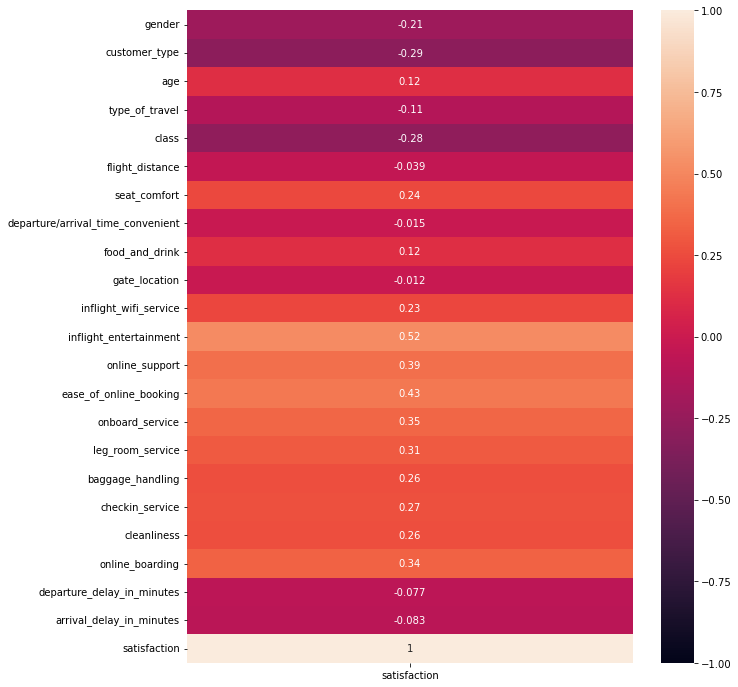

In [31]:
# Heatmap for numerical corelation
fig, ax = plt.subplots(figsize=(10,12))

sns.heatmap(tdf.corr()[['satisfaction']], ax=ax, annot=True, vmin=-1, vmax=1)

based on the heatmap the data we will be using the data with corelation higher than 0.3, which results in 6 targets and those are inflight_entertainment, online_support, ease_of_online_booking, onboard_service, leg_room_service, online_boarding

In [32]:
# dropping unused features

X_train = X_train[['inflight_entertainment','online_support','ease_of_online_booking','onboard_service','leg_room_service','online_boarding']]
X_test = X_test[['inflight_entertainment','online_support','ease_of_online_booking','onboard_service','leg_room_service','online_boarding']]
X_train.reset_index(inplace=True,drop=True)
X_test.reset_index(inplace=True,drop=True)
X_train

,inflight_entertainment,online_support,ease_of_online_booking,onboard_service,leg_room_service,online_boarding
0,4,4,5,5,5,3
1,3,4,5,4,4,5
2,4,4,4,1,5,4
3,3,2,5,4,3,5
4,3,5,1,4,2,1
...,...,...,...,...,...,...
103891,3,3,3,3,3,3
103892,5,5,4,4,4,3
103893,5,4,2,2,2,4
103894,2,2,2,2,2,2


Since the features is a "numeric" categoric then we wont be doing encoding, scaling, and outlier handling

In [33]:
# null check
X_train.isnull().any()

inflight_entertainment    False
online_support            False
ease_of_online_booking    False
onboard_service           False
leg_room_service          False
online_boarding           False
dtype: bool

no nulls in train

In [34]:
X_test.isnull().sum()

inflight_entertainment    0
online_support            0
ease_of_online_booking    0
onboard_service           0
leg_room_service          0
online_boarding           0
dtype: int64

In [35]:
y_train.isnull().sum()

0

In [36]:
y_test.isnull().sum()

0

### Target Encoding

since the target is still an object type, we must encode it first

In [37]:
y_train_enc = label_encoder.fit_transform(y_train)
y_test_enc = label_encoder.fit_transform(y_test)

## Model Definition

Algorithm : Logistic Regression, Random Forest, KNN, Naive Bayes

Metrics : Classification Report, Cross Valiadtion

## Model Training

In [38]:
# initial list for score
algo = []
score = []
std = []

### Logistic Regression

In [39]:
# Logistic Regression
model_lr = LogisticRegression(random_state=49)
model_lr.fit(X_train,y_train_enc)

param_lr = [{
     'C': [1, 10, 100, 1000],
     'solver': ['sag','saga']
     }]

grid_lr = GridSearchCV(model_lr, param_lr, cv=3, scoring='roc_auc',verbose=3)
grid_lr.fit(X_train,y_train_enc)

pipe_lr = Pipeline([('classifier', LogisticRegression(random_state=49))],memory="cache_folder")

param_lr = [
     {
     'classifier': [LogisticRegression(random_state=49)],
     'classifier__C': [1, 10, 100, 1000],
     'classifier__solver': ['sag','saga']
     }]

grid_lr = GridSearchCV(pipe_lr, param_lr, cv=3, scoring='accuracy',verbose=3)
grid_lr.fit(X_train,y_train_enc)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3] END ...................C=1, solver=sag;, score=0.873 total time=   0.1s
[CV 2/3] END ...................C=1, solver=sag;, score=0.875 total time=   0.2s
[CV 3/3] END ...................C=1, solver=sag;, score=0.875 total time=   0.1s
[CV 1/3] END ..................C=1, solver=saga;, score=0.873 total time=   0.1s
[CV 2/3] END ..................C=1, solver=saga;, score=0.875 total time=   0.0s
[CV 3/3] END ..................C=1, solver=saga;, score=0.875 total time=   0.0s
[CV 1/3] END ..................C=10, solver=sag;, score=0.873 total time=   0.1s
[CV 2/3] END ..................C=10, solver=sag;, score=0.875 total time=   0.1s
[CV 3/3] END ..................C=10, solver=sag;, score=0.875 total time=   0.1s
[CV 1/3] END .................C=10, solver=saga;, score=0.873 total time=   0.0s
[CV 2/3] END .................C=10, solver=saga;, score=0.875 total time=   0.0s
[CV 3/3] END .................C=10, solver=saga;,

GridSearchCV(cv=3,
             estimator=Pipeline(memory='cache_folder',
                                steps=[('classifier',
                                        LogisticRegression(random_state=49))]),
             param_grid=[{'classifier': [LogisticRegression(C=1,
                                                            random_state=49,
                                                            solver='sag')],
                          'classifier__C': [1, 10, 100, 1000],
                          'classifier__solver': ['sag', 'saga']}],
             scoring='accuracy', verbose=3)

In [40]:
algo.append('Logistic')
grid_lr.best_score_
score.append(grid_lr.best_score_)
grid_lr.best_score_

0.7957861707861708

In [41]:
lr_result = pd.DataFrame(grid_lr.cv_results_)
std.append(lr_result['std_test_score'].mean())
lr_result['std_test_score'].mean()

0.00029944976176895203

In [42]:
lr_best = grid_lr.best_estimator_
grid_lr.best_params_

{'classifier': LogisticRegression(C=1, random_state=49, solver='sag'),
 'classifier__C': 1,
 'classifier__solver': 'sag'}

### Random Forest

In [43]:
# Random Forest

pipe_rf = Pipeline([('classifier', RandomForestClassifier())],memory="cache_folder")

param_rf = [
     {
     'classifier': [RandomForestClassifier(random_state=49)],
     'classifier__n_estimators': [250,500],
     'classifier__criterion': ['gini','entropy']
     }]

grid_rf = GridSearchCV(pipe_rf, param_rf, cv=3, scoring='accuracy',verbose=3)
grid_rf.fit(X_train,y_train_enc)


Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3] END classifier=RandomForestClassifier(random_state=49), classifier__criterion=gini, classifier__n_estimators=250;, score=0.878 total time=   6.1s
[CV 2/3] END classifier=RandomForestClassifier(random_state=49), classifier__criterion=gini, classifier__n_estimators=250;, score=0.883 total time=   6.1s
[CV 3/3] END classifier=RandomForestClassifier(random_state=49), classifier__criterion=gini, classifier__n_estimators=250;, score=0.880 total time=   6.0s
[CV 1/3] END classifier=RandomForestClassifier(random_state=49), classifier__criterion=gini, classifier__n_estimators=500;, score=0.878 total time=  12.1s
[CV 2/3] END classifier=RandomForestClassifier(random_state=49), classifier__criterion=gini, classifier__n_estimators=500;, score=0.883 total time=  12.1s
[CV 3/3] END classifier=RandomForestClassifier(random_state=49), classifier__criterion=gini, classifier__n_estimators=500;, score=0.880 total time=  12.1s
[CV 1/3] E

GridSearchCV(cv=3,
             estimator=Pipeline(memory='cache_folder',
                                steps=[('classifier',
                                        RandomForestClassifier())]),
             param_grid=[{'classifier': [RandomForestClassifier(criterion='entropy',
                                                                n_estimators=500,
                                                                random_state=49)],
                          'classifier__criterion': ['gini', 'entropy'],
                          'classifier__n_estimators': [250, 500]}],
             scoring='accuracy', verbose=3)

In [44]:
algo.append('Random Forest')
grid_rf.best_score_
score.append(grid_rf.best_score_)
grid_rf.best_score_

0.8802841302841303

In [45]:
rf_result = pd.DataFrame(grid_rf.cv_results_)
std.append(rf_result['std_test_score'].mean())
rf_result['std_test_score'].mean()

0.0020806381134576214

In [46]:
rf_best = grid_rf.best_estimator_
grid_rf.best_params_

{'classifier': RandomForestClassifier(criterion='entropy', n_estimators=500, random_state=49),
 'classifier__criterion': 'entropy',
 'classifier__n_estimators': 500}

### K Nearest Neighbor

In [47]:
# KNN
pipe_knn = Pipeline([('classifier', KNeighborsClassifier())],memory="cache_folder")

param_knn = [
     {
     'classifier': [KNeighborsClassifier()],
     'classifier__n_neighbors': [3, 4, 5, 6, 7],
     'classifier__algorithm': ['auto','ball_tree','kd_tree']
     }]

grid_knn = GridSearchCV(pipe_knn, param_knn, cv=3, scoring='accuracy',verbose=3)
grid_knn.fit(X_train,y_train_enc)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV 1/3] END classifier=KNeighborsClassifier(), classifier__algorithm=auto, classifier__n_neighbors=3;, score=0.856 total time=   1.1s
[CV 2/3] END classifier=KNeighborsClassifier(), classifier__algorithm=auto, classifier__n_neighbors=3;, score=0.849 total time=   1.1s
[CV 3/3] END classifier=KNeighborsClassifier(), classifier__algorithm=auto, classifier__n_neighbors=3;, score=0.857 total time=   1.1s
[CV 1/3] END classifier=KNeighborsClassifier(), classifier__algorithm=auto, classifier__n_neighbors=4;, score=0.859 total time=   1.1s
[CV 2/3] END classifier=KNeighborsClassifier(), classifier__algorithm=auto, classifier__n_neighbors=4;, score=0.850 total time=   1.1s
[CV 3/3] END classifier=KNeighborsClassifier(), classifier__algorithm=auto, classifier__n_neighbors=4;, score=0.862 total time=   1.1s
[CV 1/3] END classifier=KNeighborsClassifier(), classifier__algorithm=auto, classifier__n_neighbors=5;, score=0.865 total time=  

GridSearchCV(cv=3,
             estimator=Pipeline(memory='cache_folder',
                                steps=[('classifier', KNeighborsClassifier())]),
             param_grid=[{'classifier': [KNeighborsClassifier(n_neighbors=7)],
                          'classifier__algorithm': ['auto', 'ball_tree',
                                                    'kd_tree'],
                          'classifier__n_neighbors': [3, 4, 5, 6, 7]}],
             scoring='accuracy', verbose=3)

In [48]:
algo.append('KNN')
grid_knn.best_score_
score.append(grid_knn.best_score_)
grid_knn.best_score_

0.8713424963424964

In [49]:
knn_result = pd.DataFrame(grid_knn.cv_results_)
std.append(knn_result['std_test_score'].mean())
knn_result['std_test_score'].mean()

0.0032202882584383657

In [50]:
knn_best = grid_knn.best_estimator_
grid_knn.best_params_

{'classifier': KNeighborsClassifier(n_neighbors=7),
 'classifier__algorithm': 'auto',
 'classifier__n_neighbors': 7}

### Naive Bayes

In [51]:
# Naive Bayes

pipe_nb = Pipeline([('classifier', GaussianNB())],memory="cache_folder")

param_nb = [
     {
     'classifier': [GaussianNB()],
     'classifier__var_smoothing': np.logspace(0,-9, num=100)
     }]

grid_nb = GridSearchCV(pipe_nb, param_nb, cv=3, scoring='accuracy',verbose=3)
grid_nb.fit(X_train,y_train_enc)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV 1/3] END classifier=GaussianNB(), classifier__var_smoothing=1.0;, score=0.764 total time=   0.0s
[CV 2/3] END classifier=GaussianNB(), classifier__var_smoothing=1.0;, score=0.765 total time=   0.0s
[CV 3/3] END classifier=GaussianNB(), classifier__var_smoothing=1.0;, score=0.763 total time=   0.0s
[CV 1/3] END classifier=GaussianNB(), classifier__var_smoothing=0.8111308307896871;, score=0.764 total time=   0.0s
[CV 2/3] END classifier=GaussianNB(), classifier__var_smoothing=0.8111308307896871;, score=0.766 total time=   0.0s
[CV 3/3] END classifier=GaussianNB(), classifier__var_smoothing=0.8111308307896871;, score=0.764 total time=   0.0s
[CV 1/3] END classifier=GaussianNB(), classifier__var_smoothing=0.657933224657568;, score=0.765 total time=   0.0s
[CV 2/3] END classifier=GaussianNB(), classifier__var_smoothing=0.657933224657568;, score=0.767 total time=   0.0s
[CV 3/3] END classifier=GaussianNB(), classifier__var_sm

GridSearchCV(cv=3,
             estimator=Pipeline(memory='cache_folder',
                                steps=[('classifier', GaussianNB())]),
             param_grid=[{'classifier': [GaussianNB(var_smoothing=0.0015199110829529332)],
                          'classifier__var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.519911...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])}],
             scoring='accuracy', verbose=3)

In [52]:
algo.append('Naive Bayes')
grid_nb.best_score_
score.append(grid_nb.best_score_)
grid_nb.best_score_

0.7665838915838915

In [53]:
nb_result = pd.DataFrame(grid_nb.cv_results_)
std.append(nb_result['std_test_score'].mean())
nb_result['std_test_score'].mean()

0.000642929048872538

In [54]:
nb_best = grid_nb.best_estimator_
grid_nb.best_params_

{'classifier': GaussianNB(var_smoothing=0.0015199110829529332),
 'classifier__var_smoothing': 0.0015199110829529332}

## Model Evaluation

In [55]:
algo_df = pd.DataFrame(algo,columns=['Algorithm'])
score_df = pd.DataFrame(score,columns=['Accuracy'])
std_df = pd.DataFrame(std,columns=['Std'])
final_score = pd.concat([algo_df,score_df,std_df],axis=1)
final_score

,Algorithm,Accuracy,Std
0,Logistic,0.795786,0.000299
1,Random Forest,0.880284,0.002081
2,KNN,0.871342,0.003220
3,Naive Bayes,0.766584,0.000643


In this notebook we want to predict wether a customer is satisfied with the flight or not. We want to know this because the company want to give personalized benefits for satisfied users and unatisfied customers. Since the dataset is already balanced, we will be using accuracy score to find the best model. Based on the pipeline gridsearch we have done, Random Forest and KNN has the better score with RF having 0.88 accuracy and KNN 0.87 accuracy. Another things is Random Forest has the better std compared to KNN which resulted in Random Forest being the better model overall. Thus we will be using Random Forest for our train, test, inference, and deployment

### Initial model (Base Parameter)

In [56]:
model_rf = RandomForestClassifier()

model_rf.fit(X_train,y_train_enc)

RandomForestClassifier()

In [57]:
rf_pred_train = model_rf.predict(X_train)
rf_pred_test = model_rf.predict(X_test)

In [58]:
# Train classification report
print('Classification Report : \n', classification_report(y_train_enc,rf_pred_train))

Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.88      0.88     47139
           1       0.90      0.90      0.90     56757

    accuracy                           0.89    103896
   macro avg       0.89      0.89      0.89    103896
weighted avg       0.89      0.89      0.89    103896



In [59]:
# Test classification report
print('Classification Report : \n', classification_report(y_test_enc,rf_pred_test))

Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.87      0.87     11650
           1       0.89      0.89      0.89     14324

    accuracy                           0.88     25974
   macro avg       0.88      0.88      0.88     25974
weighted avg       0.88      0.88      0.88     25974



### Final model (Best Parameter)

In [60]:
rf_pred_train_best = rf_best.predict(X_train)
rf_pred_test_best = rf_best.predict(X_test)

In [61]:
# Train classification report
print('Classification Report : \n', classification_report(y_train_enc,rf_pred_train_best))

Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.88      0.88     47139
           1       0.90      0.90      0.90     56757

    accuracy                           0.89    103896
   macro avg       0.89      0.89      0.89    103896
weighted avg       0.89      0.89      0.89    103896



In [62]:
# Test classification report
print('Classification Report : \n', classification_report(y_test_enc,rf_pred_test_best))

Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.87      0.87     11650
           1       0.89      0.89      0.89     14324

    accuracy                           0.88     25974
   macro avg       0.88      0.88      0.88     25974
weighted avg       0.88      0.88      0.88     25974



Suprisingly based on the evaluation above, both train and test before and after grid search has the exact same result, this indicated that the base Random Forest parameters is already good enough for predicting this dataset. The results are also a good fit overall. Thus we will be proceeding to inference and deployment later on.

## Model Saving

In [63]:
pickle.dump(rf_best,open('pipe.pkl','wb'))

## Model Inference

In [64]:
df_inference

,satisfaction,gender,customer_type,age,type_of_travel,class,flight_distance,seat_comfort,departure/arrival_time_convenient,food_and_drink,...,online_support,ease_of_online_booking,onboard_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes,arrival_delay_in_minutes
0,dissatisfied,Male,Loyal Customer,68,Personal Travel,Eco,1685,2,4,2,...,4,4,5,5,4,3,5,4,12,8.0
1,satisfied,Female,Loyal Customer,52,Business travel,Business,2226,4,4,4,...,5,5,5,5,5,4,5,5,54,35.0
2,satisfied,Female,Loyal Customer,34,Business travel,Business,2866,4,4,4,...,5,5,5,5,5,4,5,5,65,105.0
3,satisfied,Female,Loyal Customer,33,Business travel,Business,868,3,3,3,...,5,4,4,4,4,4,4,4,0,0.0
4,dissatisfied,Female,Loyal Customer,66,Personal Travel,Eco,683,4,3,4,...,2,1,1,4,1,1,1,1,61,48.0
5,dissatisfied,Male,Loyal Customer,41,Personal Travel,Eco,1458,1,3,1,...,5,5,1,1,4,3,1,5,0,2.0
6,dissatisfied,Male,disloyal Customer,62,Business travel,Business,2711,2,2,2,...,3,3,3,5,5,4,5,3,0,0.0
7,satisfied,Female,Loyal Customer,69,Personal Travel,Eco,990,4,4,4,...,4,4,4,4,4,3,4,4,27,12.0
8,satisfied,Female,Loyal Customer,69,Personal Travel,Eco,376,3,3,3,...,5,3,3,3,3,4,3,4,61,49.0
9,satisfied,Female,Loyal Customer,43,Business travel,Business,1932,3,3,3,...,5,4,4,5,4,3,4,4,16,0.0


In [65]:
# Inference Feature selection
df_inference_fin = df_inference[['inflight_entertainment','online_support','ease_of_online_booking','onboard_service','leg_room_service','online_boarding']]
df_inference_fin

,inflight_entertainment,online_support,ease_of_online_booking,onboard_service,leg_room_service,online_boarding
0,2,4,4,5,5,4
1,5,5,5,5,5,5
2,4,5,5,5,5,5
3,2,5,4,4,4,4
4,5,2,1,1,4,1
5,1,5,5,1,1,5
6,2,3,3,3,5,3
7,5,4,4,4,4,4
8,5,5,3,3,3,4
9,4,5,4,4,5,4


In [66]:
# Predict using Random Forest Best Parameter

y_pred = rf_best.predict(df_inference_fin)
y_pred_df = pd.DataFrame(y_pred,columns=['Prediction'])

In [67]:
# concat prediction and inference

pd.concat([df_inference, y_pred_df], axis=1)

,satisfaction,gender,customer_type,age,type_of_travel,class,flight_distance,seat_comfort,departure/arrival_time_convenient,food_and_drink,...,ease_of_online_booking,onboard_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes,arrival_delay_in_minutes,Prediction
0,dissatisfied,Male,Loyal Customer,68,Personal Travel,Eco,1685,2,4,2,...,4,5,5,4,3,5,4,12,8.0,0
1,satisfied,Female,Loyal Customer,52,Business travel,Business,2226,4,4,4,...,5,5,5,5,4,5,5,54,35.0,1
2,satisfied,Female,Loyal Customer,34,Business travel,Business,2866,4,4,4,...,5,5,5,5,4,5,5,65,105.0,1
3,satisfied,Female,Loyal Customer,33,Business travel,Business,868,3,3,3,...,4,4,4,4,4,4,4,0,0.0,1
4,dissatisfied,Female,Loyal Customer,66,Personal Travel,Eco,683,4,3,4,...,1,1,4,1,1,1,1,61,48.0,1
5,dissatisfied,Male,Loyal Customer,41,Personal Travel,Eco,1458,1,3,1,...,5,1,1,4,3,1,5,0,2.0,0
6,dissatisfied,Male,disloyal Customer,62,Business travel,Business,2711,2,2,2,...,3,3,5,5,4,5,3,0,0.0,0
7,satisfied,Female,Loyal Customer,69,Personal Travel,Eco,990,4,4,4,...,4,4,4,4,3,4,4,27,12.0,1
8,satisfied,Female,Loyal Customer,69,Personal Travel,Eco,376,3,3,3,...,3,3,3,3,4,3,4,61,49.0,1
9,satisfied,Female,Loyal Customer,43,Business travel,Business,1932,3,3,3,...,4,4,5,4,3,4,4,16,0.0,1


## Conclusion

In conclusion, we want to make a model for classifying an airlines customer on wether they are satisfied with the service or not.

Based on the EDA we found out that females are generally satisfied with the service compared to male, and that most customer who fills the questionaire are a loyal customer. Furthermore, business user are more satisfied than personal traveler.

Since the categoric data are an integer from 0 to 5, the data will not be encoded, scaled, or outlier handled. Plus the target is already balanced.

The Model used in this notebook are, Logistic Regression, Random Forest Classifier, K nearest Neighbor, and Naive Bayes. In this notebook I applied pipeline grid search for all models, and the result ended with Random Forest having the best accuracy with good stability (std).

When we compare the base parameter with best parameter of the grid search, the results does not change, thus implies that the base parameter are already good enough for predicting this dataset. The model also achieve good fit with an accuracy score of 0.89 on train and 0.88 on test. Overall the model is good and will be deployed
